In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('adopt.csv')

In [3]:
df.head()

,name,type,breed,color,sex,size,shelter,days_in_shelter,intake_type,outcome,outcome_condition,age_in_days,outcome_day_of_week
0,yes,CAT,SIAMESE,SEAL PT,Spayed,KITTN,CA03,6,OWNER SURRENDER,ADOPTION,PENDING,101,4
1,yes,CAT,DOMESTIC SH,BRN TABBY,Neutered,SMALL,CS05,20,STRAY,ADOPTION,PENDING,1116,4
2,yes,CAT,DOMESTIC SH,BLACK,Neutered,KITTN,WESTFARM,18,STRAY,ADOPTION,HEALTHY,129,2
3,yes,CAT,DOMESTIC SH,BLACK/WHITE,Spayed,KITTN,WESTFARM,18,STRAY,ADOPTION,HEALTHY,129,2
4,yes,DOG,LABRADOR RETR/MIX,BLUE/WHITE,Neutered,MED,DS72,1,CONFISCATE,RETURN TO OWNER,PENDING,398,4


In [4]:
df.days_in_shelter.describe()

count    15667.000000
mean        20.434927
std         36.200934
min          0.000000
25%          2.000000
50%         11.000000
75%         26.000000
max        891.000000
Name: days_in_shelter, dtype: float64

(array([1.5267e+04, 3.0300e+02, 6.3000e+01, 1.3000e+01, 6.0000e+00,
        3.0000e+00, 1.0000e+00, 0.0000e+00, 7.0000e+00, 4.0000e+00]),
 array([  0. ,  89.1, 178.2, 267.3, 356.4, 445.5, 534.6, 623.7, 712.8,
        801.9, 891. ]),
 <BarContainer object of 10 artists>)

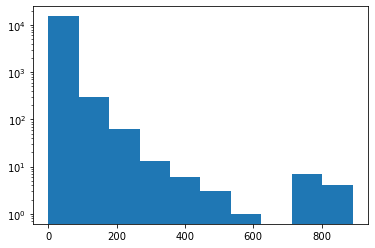

In [5]:
plt.hist(df.days_in_shelter, log=True)

In [6]:
df_short = (df[df.days_in_shelter <= 90]).reset_index(drop=True)

In [7]:
df_short.shape

(15281, 13)

# Target 

In [8]:
df_short.outcome.value_counts()

ADOPTION           6145
RETURN TO OWNER    5389
TRANSFER           2168
EUTHANIZE          1460
DIED                 55
DISPOSAL             22
RTOS                 21
APPT                 18
ESCAPED/STOLEN        3
Name: outcome, dtype: int64

In [9]:
df_short.outcome = (df_short.outcome
              .apply(lambda x: 
                     'home' if x == 'ADOPTION' or x == 'RETURN TO OWNER' 
                         else 'no_home'))

In [10]:
outcome = df_short.outcome.value_counts(normalize=True)
outcome

home       0.754794
no_home    0.245206
Name: outcome, dtype: float64

/Users/andywang/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0, 0.5, '%')

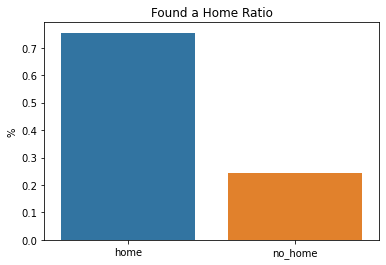

In [11]:
sns.barplot(outcome.index, outcome.values)
plt.title('Found a Home Ratio')
plt.ylabel('%')

In [12]:
df_short['outcome'] = (df_short.outcome.apply(lambda x:
                    1 if x == 'home' else 0))

In [13]:
df_short.outcome.unique()

array([1, 0])

# FEATURES

## _Name_

In [14]:
df_short.head()

,name,type,breed,color,sex,size,shelter,days_in_shelter,intake_type,outcome,outcome_condition,age_in_days,outcome_day_of_week
0,yes,CAT,SIAMESE,SEAL PT,Spayed,KITTN,CA03,6,OWNER SURRENDER,1,PENDING,101,4
1,yes,CAT,DOMESTIC SH,BRN TABBY,Neutered,SMALL,CS05,20,STRAY,1,PENDING,1116,4
2,yes,CAT,DOMESTIC SH,BLACK,Neutered,KITTN,WESTFARM,18,STRAY,1,HEALTHY,129,2
3,yes,CAT,DOMESTIC SH,BLACK/WHITE,Spayed,KITTN,WESTFARM,18,STRAY,1,HEALTHY,129,2
4,yes,DOG,LABRADOR RETR/MIX,BLUE/WHITE,Neutered,MED,DS72,1,CONFISCATE,1,PENDING,398,4


<AxesSubplot:xlabel='name', ylabel='count'>

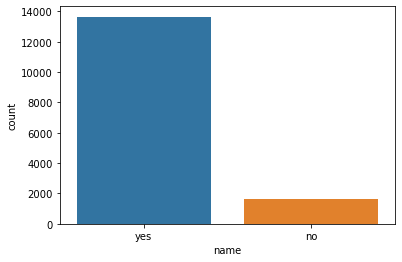

In [15]:
sns.countplot(x='name', data=df_short)

In [16]:
df_short = pd.get_dummies(columns=['name'], drop_first=True, data=df_short)

In [17]:
df_short.columns

Index(['type', 'breed', 'color', 'sex', 'size', 'shelter', 'days_in_shelter',
       'intake_type', 'outcome', 'outcome_condition', 'age_in_days',
       'outcome_day_of_week', 'name_yes'],
      dtype='object')

## _Type_  

In [18]:
df_short.type.unique()

array(['CAT', 'DOG', 'OTHER'], dtype=object)

<AxesSubplot:xlabel='type', ylabel='count'>

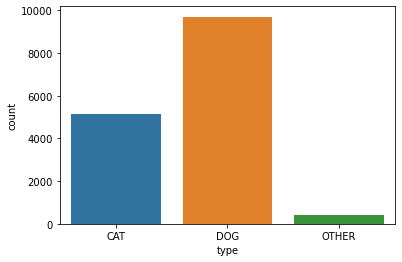

In [19]:
sns.countplot(x='type', data=df_short)

In [20]:
df_short = pd.get_dummies(columns=['type'], drop_first=True, data=df_short)

In [21]:
df_short.columns

Index(['breed', 'color', 'sex', 'size', 'shelter', 'days_in_shelter',
       'intake_type', 'outcome', 'outcome_condition', 'age_in_days',
       'outcome_day_of_week', 'name_yes', 'type_DOG', 'type_OTHER'],
      dtype='object')

## _Breed_

In [22]:
df_short.breed.unique()

array(['SIAMESE', 'DOMESTIC SH', 'LABRADOR RETR/MIX', 'LABRADOR RETR',
       'DOMESTIC LH', 'DOMESTIC MH', 'SHIBA INU', 'MIN PINSCHER/MIX',
       'POODLE MIN', 'PIT BULL', 'BORDER COLLIE', 'GERM SHEPHERD/MIX',
       'YORKSHIRE TERR', 'CHIHUAHUA SH/MIX', 'CHIHUAHUA SH',
       'GERM SHEPHERD', 'SIAMESE/MIX', 'RAT TERRIER', 'PLOTT HOUND/MIX',
       'CAIRN TERRIER/MIX', 'SIBERIAN HUSKY', 'CATAHOULA/LABRADOR RETR',
       'QUEENSLAND HEEL/MIX', 'POMERANIAN', 'GERM SH POINT/PIT BULL',
       'CHIHUAHUA SH/YORKSHIRE TERR', 'GREAT PYRENEES', 'PEKINGESE/MIX',
       'PARSON RUSS TER/MIX', 'GOLDEN RETR', 'BOXER', 'BASSET HOUND',
       'RAT TERRIER/MIX', 'TR WALKER HOUND/MIX', 'PIT BULL/MIX',
       'ENG SPRNGR SPAN/MIX', 'BOSTON TERRIER', 'MIN PINSCHER',
       'CHINESE CRESTED/POODLE TOY', 'ALASKAN HUSKY',
       'AUST CATTLE DOG/MIX', 'GREAT PYRENEES/MIX',
       'LABRADOR RETR/SIBERIAN HUSKY', 'DALMATIAN/AMERICAN STAFF',
       'POINTER/MIX', 'YORKSHIRE TERR/PARSON RUSS TER', 'AMERICAN 

In [23]:
df_short.breed = (df_short.breed
                  .apply(lambda x: 
                         'mixed' if 'MIX' in x or '/' in x else 'pure'))

<AxesSubplot:xlabel='breed', ylabel='count'>

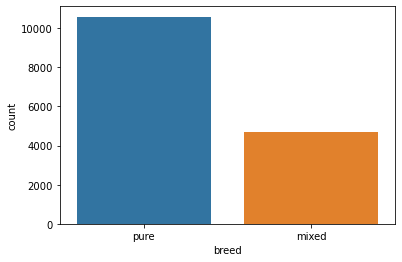

In [24]:
sns.countplot(x='breed', data=df_short)

In [25]:
df_short = pd.get_dummies(columns=['breed'], drop_first=True, data=df_short)

In [26]:
df_short.columns

Index(['color', 'sex', 'size', 'shelter', 'days_in_shelter', 'intake_type',
       'outcome', 'outcome_condition', 'age_in_days', 'outcome_day_of_week',
       'name_yes', 'type_DOG', 'type_OTHER', 'breed_pure'],
      dtype='object')

## _Color_  

In [27]:
color = df_short.color.value_counts(normalize=True)
color.head(20)

BLACK/WHITE         0.116812
BLACK               0.092402
BRN TABBY           0.051567
BLACK/TAN           0.049735
WHITE               0.048688
TAN                 0.043387
BROWN/WHITE         0.036385
BROWN               0.031150
TAN/WHITE           0.030234
GRAY/WHITE          0.027158
BRN TABBY/WHITE     0.027158
TRICOLOR            0.026765
WHITE/BLACK         0.026176
GRAY                0.022315
BLACK/BROWN         0.017473
GRAY TABBY          0.017145
WHITE/BROWN         0.016818
ORG TABBY           0.014659
BR BRINDLE/WHITE    0.013873
BROWN/BLACK         0.013677
Name: color, dtype: float64

In [28]:
df_short.color = df_short.color.apply(lambda x:
                                     'single' if '/' in x else 'mix')

In [29]:
df_short.color.unique()

array(['mix', 'single'], dtype=object)

<AxesSubplot:xlabel='color', ylabel='count'>

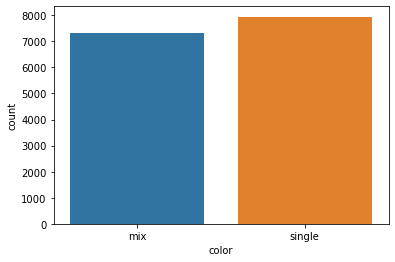

In [30]:
sns.countplot(x='color', data=df_short)

In [31]:
df_short = pd.get_dummies(columns=['color'], drop_first=True, data=df_short)

## _Sex_

In [32]:
df_short.sex.value_counts()

Neutered    6245
Spayed      5382
Male        2077
Female      1577
Name: sex, dtype: int64

In [33]:
df_short.sex = df_short.sex.apply(lambda x:
                                  'yes' if x == 'Neutered' or x == 'Spayed'
                                  else 'no')

In [34]:
df_short.sex.unique()

array(['yes', 'no'], dtype=object)

In [35]:
df_short.rename(columns={'sex': 'gonadectomy'}, inplace=True)

<AxesSubplot:xlabel='gonadectomy', ylabel='count'>

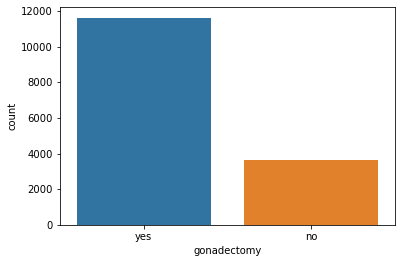

In [36]:
sns.countplot(x='gonadectomy', data=df_short)

In [37]:
df_short = pd.get_dummies(columns=['gonadectomy'], drop_first=True, data=df_short)

In [38]:
df_short.columns

Index(['size', 'shelter', 'days_in_shelter', 'intake_type', 'outcome',
       'outcome_condition', 'age_in_days', 'outcome_day_of_week', 'name_yes',
       'type_DOG', 'type_OTHER', 'breed_pure', 'color_single',
       'gonadectomy_yes'],
      dtype='object')

## _Size_ 

In [39]:
df_short

,size,shelter,days_in_shelter,intake_type,outcome,outcome_condition,age_in_days,outcome_day_of_week,name_yes,type_DOG,type_OTHER,breed_pure,color_single,gonadectomy_yes
0,KITTN,CA03,6,OWNER SURRENDER,1,PENDING,101,4,1,0,0,1,0,1
1,SMALL,CS05,20,STRAY,1,PENDING,1116,4,1,0,0,1,0,1
2,KITTN,WESTFARM,18,STRAY,1,HEALTHY,129,2,1,0,0,1,0,1
3,KITTN,WESTFARM,18,STRAY,1,HEALTHY,129,2,1,0,0,1,1,1
4,MED,DS72,1,CONFISCATE,1,PENDING,398,4,1,1,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15276,MED,DS66,29,STRAY,1,PENDING,2192,1,1,1,0,1,1,0
15277,KITTN,LOBBY,42,STRAY,1,HEALTHY,73,2,1,0,0,1,0,1
15278,TOY,DA16,13,STRAY,0,HEALTHY,378,4,0,1,0,0,1,0
15279,TOY,LOBBY,16,STRAY,1,TREATABLE/REHAB,715,5,1,1,0,0,1,1


<AxesSubplot:xlabel='size', ylabel='count'>

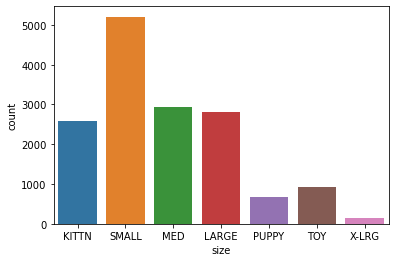

In [40]:
sns.countplot(x='size', data=df_short)

In [41]:
size_dict = {'KITTN': 'X_SMALL', 'PUPPY': 'X_SMALL', 'TOY': 'X_SMALL'}

In [42]:
df_short = df_short.replace({'size': size_dict})

<AxesSubplot:xlabel='size', ylabel='count'>

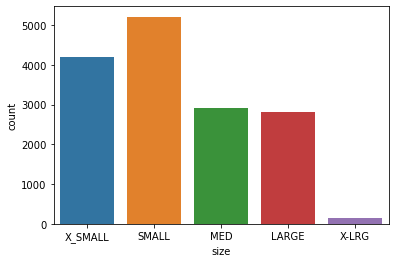

In [43]:
sns.countplot(x='size', data=df_short)

In [44]:
df_short = pd.get_dummies(columns=['size'], drop_first=True, data=df_short)

In [45]:
df_short.columns

Index(['shelter', 'days_in_shelter', 'intake_type', 'outcome',
       'outcome_condition', 'age_in_days', 'outcome_day_of_week', 'name_yes',
       'type_DOG', 'type_OTHER', 'breed_pure', 'color_single',
       'gonadectomy_yes', 'size_MED', 'size_SMALL', 'size_X-LRG',
       'size_X_SMALL'],
      dtype='object')

In [46]:
df_short.drop('shelter', axis=1, inplace=True)

## _Inake Type_

In [47]:
df_short.intake_type.value_counts()

STRAY              10721
OWNER SURRENDER     2570
CONFISCATE           988
TRANSFER             369
ADOPTION RETURN      340
QUARANTINE           275
OS APPT               18
Name: intake_type, dtype: int64

In [48]:
intake_dict = {'ADOPTION RETURN':'OTHER', 'CONFISCATE':'OTHER',
               'OS APPT':'OTHER', 'OWNER SURRENDER':'OTHER', 
               'QUARANTINE':'OTHER', 'TRANSFER':'OTHER'}

df_short = df_short.replace({'intake_type':intake_dict})

In [49]:
df_short.intake_type.value_counts()

STRAY    10721
OTHER     4560
Name: intake_type, dtype: int64

In [50]:
df_short = pd.get_dummies(columns=['intake_type'], drop_first=True, 
                         data=df_short)

In [51]:
df_short.columns

Index(['days_in_shelter', 'outcome', 'outcome_condition', 'age_in_days',
       'outcome_day_of_week', 'name_yes', 'type_DOG', 'type_OTHER',
       'breed_pure', 'color_single', 'gonadectomy_yes', 'size_MED',
       'size_SMALL', 'size_X-LRG', 'size_X_SMALL', 'intake_type_STRAY'],
      dtype='object')

## _Outcome Condition_

(array([0, 1, 2, 3, 4, 5]),
 [Text(0, 0, 'PENDING'),
  Text(1, 0, 'HEALTHY'),
  Text(2, 0, 'TREATABLE/MANAGEABLE'),
  Text(3, 0, 'UNTREATABLE'),
  Text(4, 0, 'TREATABLE/REHAB'),
  Text(5, 0, 'DEAD')])

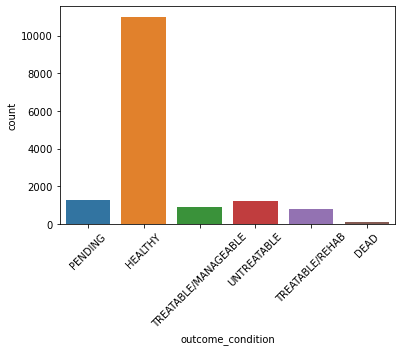

In [52]:
sns.countplot(x='outcome_condition', data=df_short)
plt.xticks(rotation=45)

In [53]:
df_short.outcome_condition = (df_short.outcome_condition
                              .apply(lambda x:'positive' if x == 'HEALTHY' 
                                     or x == 'TREATABLE/MANAGEABLE' 
                                     or x == 'TREATABLE/REHAB' 
                                     else 'negative'))

In [54]:
df_short.outcome_condition.unique()

array(['negative', 'positive'], dtype=object)

<AxesSubplot:xlabel='outcome_condition', ylabel='count'>

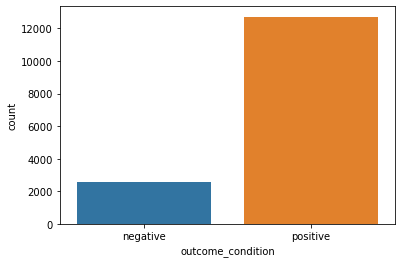

In [55]:
sns.countplot(x='outcome_condition', data=df_short)

In [56]:
df_short = pd.get_dummies(columns=['outcome_condition'], drop_first=True, 
                         data=df_short)

In [57]:
df_short.head()

,days_in_shelter,outcome,age_in_days,outcome_day_of_week,name_yes,type_DOG,type_OTHER,breed_pure,color_single,gonadectomy_yes,size_MED,size_SMALL,size_X-LRG,size_X_SMALL,intake_type_STRAY,outcome_condition_positive
0,6,1,101,4,1,0,0,1,0,1,0,0,0,1,0,0
1,20,1,1116,4,1,0,0,1,0,1,0,1,0,0,1,0
2,18,1,129,2,1,0,0,1,0,1,0,0,0,1,1,1
3,18,1,129,2,1,0,0,1,1,1,0,0,0,1,1,1
4,1,1,398,4,1,1,0,0,1,1,1,0,0,0,0,0


In [58]:
df_short.insert(2, column='days_in_shelter_temp', value=df_short.days_in_shelter)

In [59]:
df_short.drop('days_in_shelter', axis=1, inplace=True)

In [60]:
df_short.rename(columns = {'days_in_shelter_temp': 'days_in_shelter'},
               inplace=True)

## _Outcome Day of Week_ 

<AxesSubplot:xlabel='outcome_day_of_week', ylabel='count'>

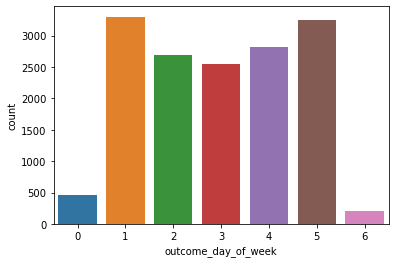

In [61]:
sns.countplot(x='outcome_day_of_week', data=df_short)

In [62]:
df_short = pd.get_dummies(columns=['outcome_day_of_week'], drop_first=True, 
                         data=df_short)

In [63]:
df_short

,outcome,days_in_shelter,age_in_days,name_yes,type_DOG,type_OTHER,breed_pure,color_single,gonadectomy_yes,size_MED,...,size_X-LRG,size_X_SMALL,intake_type_STRAY,outcome_condition_positive,outcome_day_of_week_1,outcome_day_of_week_2,outcome_day_of_week_3,outcome_day_of_week_4,outcome_day_of_week_5,outcome_day_of_week_6
0,1,6,101,1,0,0,1,0,1,0,...,0,1,0,0,0,0,0,1,0,0
1,1,20,1116,1,0,0,1,0,1,0,...,0,0,1,0,0,0,0,1,0,0
2,1,18,129,1,0,0,1,0,1,0,...,0,1,1,1,0,1,0,0,0,0
3,1,18,129,1,0,0,1,1,1,0,...,0,1,1,1,0,1,0,0,0,0
4,1,1,398,1,1,0,0,1,1,1,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15276,1,29,2192,1,1,0,1,1,0,1,...,0,0,1,0,1,0,0,0,0,0
15277,1,42,73,1,0,0,1,0,1,0,...,0,1,1,1,0,1,0,0,0,0
15278,0,13,378,0,1,0,0,1,0,0,...,0,1,1,1,0,0,0,1,0,0
15279,1,16,715,1,1,0,0,1,1,0,...,0,1,1,1,0,0,0,0,1,0


In [64]:
df_short.to_csv('EDA-N.csv')